# Step 0: Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

# Step 1: Reading my dataset

In this step, I used an anxiety level dataset. Each row contains personal informations about a person, such as his age, sleep hours and other important factors that may affect their anxiety level. The goal will be to predict people's anxiety level based off their informations.

In [3]:
df = pd.read_csv("enhanced_anxiety_dataset.csv")
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6.0
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3.0
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4.0
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4.0


# Data set info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

# Step 2: Cleaning up the dataset

In this step, I cleaned up and prepared the categorical data. I applied one-hot encoding to Gender and Occupation columns. Then i converted the binary variables (Smoking, Dizziness, etc.) from Yes/No into 1/0 values. With this we can ensure that our dataset will be suitable for our model.

In [5]:
from sklearn.preprocessing import OneHotEncoder

variables = ['Gender','Occupation']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

df['Smoking'] = df['Smoking'].replace({
    'Yes' : 1,
    'No' : 0,
})

df['Family History of Anxiety'] = df['Family History of Anxiety'].replace({
    'Yes' : 1,
    'No' : 0,
})
df['Dizziness'] = df['Dizziness'].replace({
    'Yes' : 1,
    'No' : 0,
})
df['Medication'] = df['Medication'].replace({
    'Yes' : 1,
    'No' : 0,
})
df['Recent Major Life Event'] = df['Recent Major Life Event'].replace({
    'Yes' : 1,
    'No' : 0,
})

df


C:\Users\admin\AppData\Local\Temp\ipykernel_276\1275699494.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking'] = df['Smoking'].replace({
C:\Users\admin\AppData\Local\Temp\ipykernel_276\1275699494.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Anxiety'] = df['Family History of Anxiety'].replace({
C:\Users\admin\AppData\Local\Temp\ipykernel_276\1275699494.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior,

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,1,0,10,114,14,...,0,0,0,0,0,0,0,0,0,0
1,46,6.2,5.7,200,8,1,1,1,62,23,...,0,0,0,0,0,1,0,0,0,0
2,64,5.0,3.7,117,4,0,1,1,91,28,...,0,0,0,0,0,0,1,0,0,0
3,20,5.8,2.8,360,6,1,0,4,86,17,...,0,0,0,0,0,0,0,1,0,0
4,49,8.2,2.3,247,4,1,0,1,98,19,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,1,0,8,91,28,...,0,1,0,0,0,0,0,0,0,0
10996,50,6.6,3.6,64,17,1,0,7,95,17,...,0,0,0,0,0,0,0,0,0,1
10997,29,6.7,6.9,159,14,0,0,8,72,16,...,0,0,0,0,0,1,0,0,0,0
10998,53,5.7,2.7,248,8,0,0,4,112,28,...,0,0,0,0,0,0,0,0,0,0


# Step 3: Train/test/validation split

At this step, i split the data into features (x) and target (y), then devided it into training (70%), validation (15%) and test (15%).

In [6]:
X= df.drop(columns='Anxiety Level (1-10)')
y= df['Anxiety Level (1-10)']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Step 4: Creating a neural network

I created a neural network with batch normalization a few dense layers and dropout regularization. The model predits a continuous anxiety level using Adam optimizer and MSE loss.

In [79]:
variable_amount=len(X.columns)

model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(10, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)),
        layers.Dropout(0.1),
        layers.Dense(12, activation="relu"),
        layers.Dense(18, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\admin\deep_learning\deep_learning\.venv\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 18)             │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843 (3.29 KB)

 Trainable params: 779 (3.04 KB)

 Non-trainable params: 64 (256.00 B)

# Step 5: Training the model

At first, I fit the data into the neutral network, and check how to training loss changes with plot, we can see it passed the test!

Epoch 1/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.6143 - val_loss: 5.4686
Epoch 2/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0696 - val_loss: 2.6029
Epoch 3/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2906 - val_loss: 1.7636
Epoch 4/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8096 - val_loss: 1.6021
Epoch 5/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7267 - val_loss: 1.5465
Epoch 6/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7078 - val_loss: 1.5195
Epoch 7/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6445 - val_loss: 1.4670
Epoch 8/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5853 - val_loss: 1.4296
Epoch 9/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5719 - val_loss: 1.4132
Epoch 10/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5617 - val_loss: 1.3834
Epoch 11/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5305 - val_loss: 1.4224
Epoch 12/500
241/241 ━━━━━━━━━━━━━━━━━━━

<Axes: >

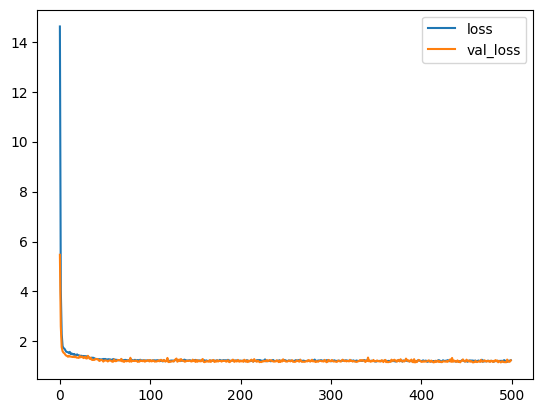

In [80]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

loss_df=pd.DataFrame(model.history.history)

loss_df.plot()

Using the scatter plot and test data, we can see how the model works, and makes predictions.

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Test True Y,Model Predictions
0,3.0,1.837488
1,2.0,3.744925
2,6.0,4.398645
3,3.0,2.328957
4,3.0,2.891064
...,...,...
1645,5.0,3.861600
1646,10.0,8.619382
1647,5.0,3.543463
1648,3.0,2.330565


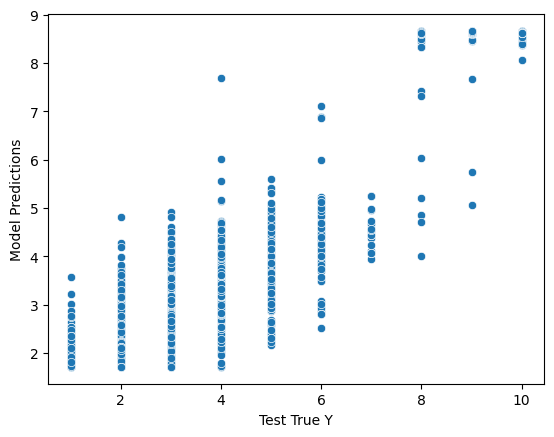

In [81]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
pred_df

Now by visualizing it with distplot, we can see how well the prediction distribution follows the normal distribution

C:\Users\admin\AppData\Local\Temp\ipykernel_37384\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


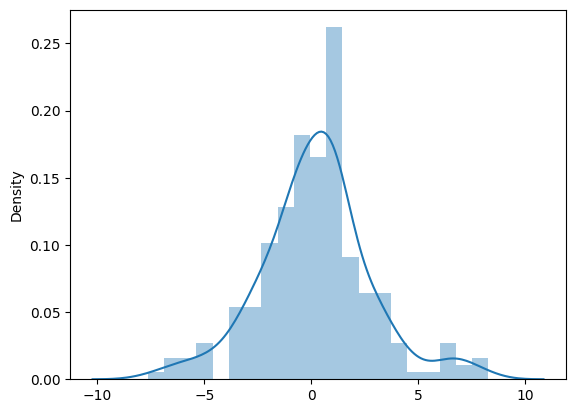

In [83]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

# Step 6: Metrics

Here, I use metrics to see how well it describes the original dataset.

In [84]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2))

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2))

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2))

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
0.83

MSE
1.08

RMSE:
1.04

R-squared:
0.75

Explained variance score:
0.77


# Step 7: Testing the model with madeup numbers

Now I made up imaginary numbers for a raw. I was using numbers, that characterizes a stressed person, to see the efficiency of the trained model.

In [89]:
tester_row= {
    'Age': 18, 
    'Sleep Hours': 5, 
    'Physical Activity (hrs/week)': 1,
    'Caffeine Intake (mg/day)': 500,
    'Alcohol Consumption (drinks/week)': 20,
    'Smoking': 1,     
    'Family History of Anxiety': 1, 
    'Stress Level (1-10)': 10,
    'Heart Rate (bpm)': 120, 
    'Breathing Rate (breaths/min)': 40,
    'Sweating Level (1-5)': 5, 
       'Dizziness': 1, 
       'Medication': 1,
       'Therapy Sessions (per month)': 0, 
       'Recent Major Life Event': 1,
       'Diet Quality (1-10)': 1,  
       'Gender_Female': 0,
       'Gender_Male': 0, 
       'Gender_Other': 1, 
       'Occupation_Artist': 0,
       'Occupation_Athlete': 0, 
       'Occupation_Chef': 0, 
       'Occupation_Doctor': 0,
       'Occupation_Engineer': 1, 
       'Occupation_Freelancer': 0, 
       'Occupation_Lawyer': 0,
       'Occupation_Musician': 0, 
       'Occupation_Nurse': 0, 
       'Occupation_Other': 0,
       'Occupation_Scientist': 0, 
       'Occupation_Student': 0, 
       'Occupation_Teacher': 0
}

tester_row=pd.DataFrame([tester_row])

result= model.predict(tester_row)[0]

print("\nEstimated anxiety level based on the given numbers: ")
print(round(float(result[0]), 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

Estimated anxiety level based on the given numbers: 
9.0
